# Homework 2

## Resources:

    https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
    http://csc.ucdavis.edu/~cmg/Group/readings/pythonissue_3of4.pdf
    http://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples

In [1]:
%matplotlib inline

In [2]:
# imports
import numpy as np

from scipy.integrate import ode
from scipy.integrate import solve_ivp

from matplotlib import pyplot as plt
import seaborn as sns

import pandas

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Quantitative 1

## (a) Solve the ODEs

## Logistic equation

## $\frac{dx}{dt} = r x \left [ 1 - \frac{x}{k} \right ]$

In [4]:
def logistic(t, x, r=0.3, k=0.8):
    return r*x * (1- x/k)

In [57]:
r_logistic = ode(logistic).set_integrator('zvode', method='bdf')

### Evaluations

In [41]:
def eval_logistic(t0, x0, dt=1., tstep=100):
    # Init
    r_logistic.set_initial_value(x0, t0)
    ts, rs = [], []
    # Loop
    for ii in range(tstep):
        # Evaluate
        ev = float(np.real(r_logistic.integrate(r_logistic.t+dt)))
        # Save
        ts.append(r_logistic.t)
        rs.append(ev)
    #
    return [t0]+ts, [x0]+rs

### Initial conditions (positive)

In [52]:
x0s = [0.1, 0.5, 1., 2.]
t0s = [0.]*len(x0s)

### Plot

Text(0, 0.5, 'x')

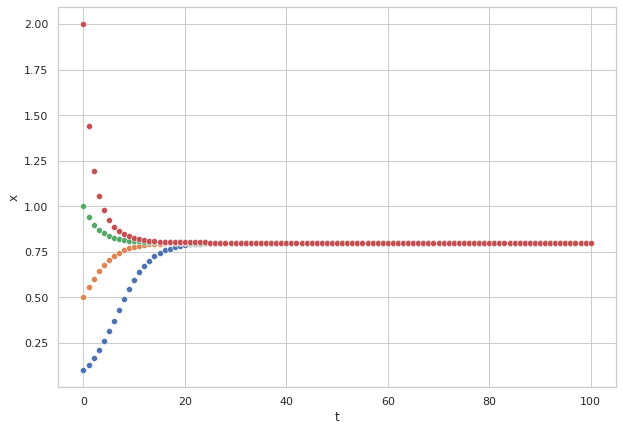

In [54]:
fig = plt.figure(figsize=(10,7))
for t0, x0 in zip(t0s, x0s):
    #import pdb; pdb.set_trace()
    ts, rs = eval_logistic(t0, x0)
    ax = sns.scatterplot(x=ts, y=rs)
#
ax.set_xlabel('t')
ax.set_ylabel('x')

### These are all attracted to $x=0.8$

### How about some negative initial conditions?

In [55]:
x0sn = [-2.]
t0sn = [0.]*len(x0sn)

/home/xavier/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1012: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))
/home/xavier/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1012: UserWarning: zvode: Excess accuracy requested. (Tolerances too small.)
  self.messages.get(istate, unexpected_istate_msg)))


Text(0, 0.5, 'x')

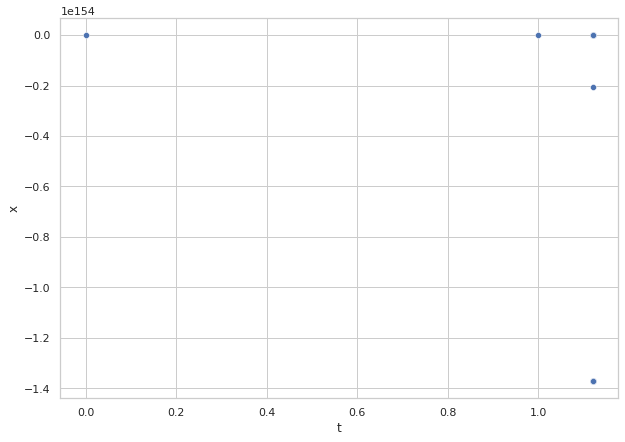

In [56]:
fig = plt.figure(figsize=(10,7))
for t0, x0 in zip(t0sn, x0sn):
    #import pdb; pdb.set_trace()
    ts, rs = eval_logistic(t0, x0)
    ax = sns.scatterplot(x=ts, y=rs)
#
ax.set_xlabel('t')
ax.set_ylabel('x')

## Lorenz equations

## $\frac{dX}{dt} = p r (-X + Y)$

## $\frac{dY}{dt} = rX - Y - XZ$

## $\frac{dZ}{dt} = XY - bZ$

### Define the functions

In [68]:
def lorentz(t, XYZ, pbr):
    dXdt = pbr[0] * (-XYZ[0] + XYZ[1])
    dYdt = pbr[2]*XYZ[0] - XYZ[1] - XYZ[0]*XYZ[2]
    dZdt = XYZ[0]*XYZ[1] - pbr[1]*XYZ[2]
    # 
    return dXdt, dYdt, dZdt

### $pr = 10, b=8/3, r=0.5$

In [62]:
pbr0 = (10., 8/3., .5)

### Initial conditions

In [80]:
nstep = 100
tspan = np.linspace(0, 5, nstep)

In [94]:
XYZs = [[0., 0., 0.], [1., 1., 1.], [-1, 0., 1.], [-1,-1,-1]]
t0s = [0., 0., 0.]*len(x0sn)

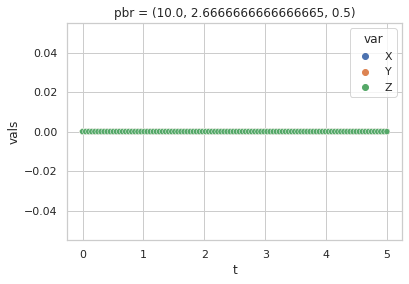

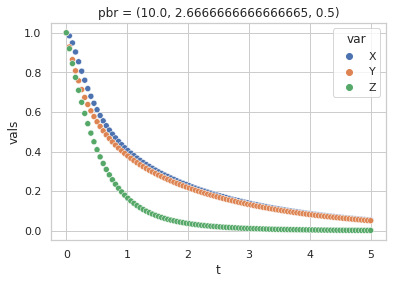

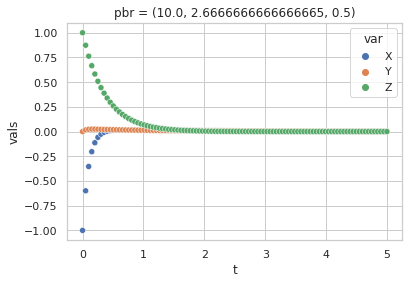

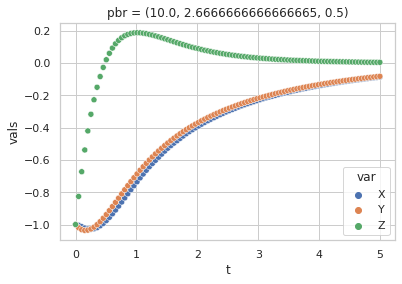

In [95]:
for kk in range(len(XYZs)):
    # %% Solve differential equation
    XYZ = XYZs[kk]
    sol = solve_ivp(lambda t, xyz: lorentz(t, xyz, pbr0), 
                [tspan[0], tspan[-1]], XYZ, t_eval=tspan)
    # Table me
    df = pandas.DataFrame(dict(t=np.array([sol.t]*3).flatten(), vals=sol.y.flatten(),
                          var=['X']*nstep + ['Y']*nstep + ['Z']*nstep))
    # Plot me
    ax = sns.scatterplot(data=df, x='t', y='vals', hue='var')
    ax.set_title('pbr = {}'.format(pbr0))
    plt.show()

### For these values of pr,b,r we see an attraction to $X=Y=Z=0$

### $pr = 10, b=8/3, r=2$

In [98]:
pbr1 = (10., 8/3., 2)

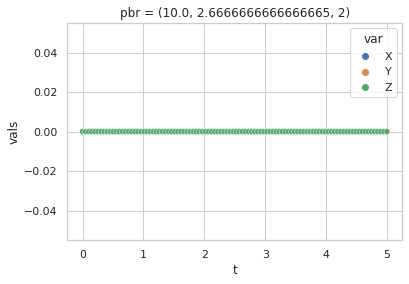

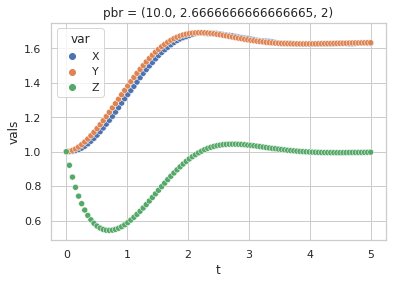

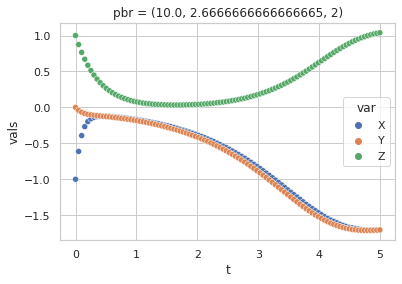

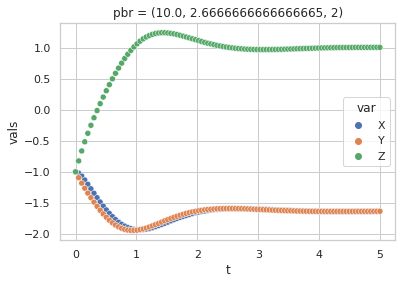

In [96]:
for kk in range(len(XYZs)):
    # %% Solve differential equation
    XYZ = XYZs[kk]
    sol = solve_ivp(lambda t, xyz: lorentz(t, xyz, pbr1), 
                [tspan[0], tspan[-1]], XYZ, t_eval=tspan)
    # Table me
    df = pandas.DataFrame(dict(t=np.array([sol.t]*3).flatten(), vals=sol.y.flatten(),
                          var=['X']*nstep + ['Y']*nstep + ['Z']*nstep))
    # Plot me
    ax = sns.scatterplot(data=df, x='t', y='vals', hue='var')
    ax.set_title('pbr = {}'.format(pbr1))
    plt.show()

### Here, $Z=1$ (other than $Z[t=0]=0$ which is an unstable point) at late times while $X,Y$ have values that depend on the initial conditions

### Last, $pr = 10, b=8/3, r=28$

In [97]:
pbr2 = (10., 8/3., 28)

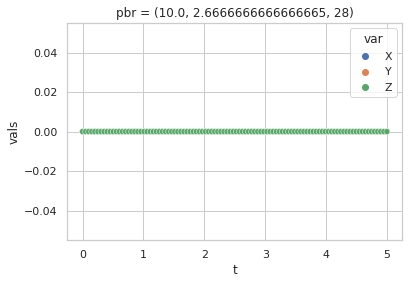

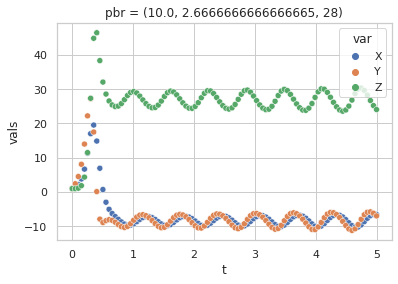

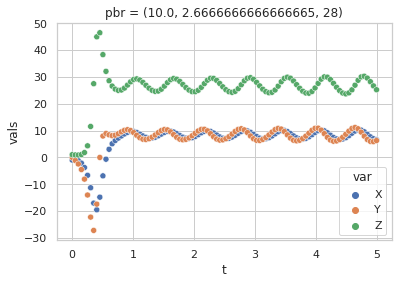

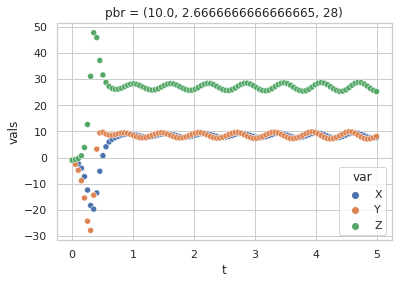

In [99]:
for kk in range(len(XYZs)):
    # %% Solve differential equation
    XYZ = XYZs[kk]
    sol = solve_ivp(lambda t, xyz: lorentz(t, xyz, pbr2), 
                [tspan[0], tspan[-1]], XYZ, t_eval=tspan)
    # Table me
    df = pandas.DataFrame(dict(t=np.array([sol.t]*3).flatten(), vals=sol.y.flatten(),
                          var=['X']*nstep + ['Y']*nstep + ['Z']*nstep))
    # Plot me
    ax = sns.scatterplot(data=df, x='t', y='vals', hue='var')
    ax.set_title('pbr = {}'.format(pbr2))
    plt.show()

### Pretty wild!  Looks like $Z$ is attracted to a value near 28 (Lyaponov stable)

### $X,Y$ also appear Lyaponov stable but to a value that depends on the initial conditions.

## Lotka Volterra

## $\frac{dX}{dt} = k_1 X - k_2 XY$

## $\frac{dY}{dt} = k_3 X Y - k_4 Y$

In [100]:
def lotka(t, XY, ks):
    dXdt = ks[0]*XY[0] - ks[1]*XY[0]*XY[1]
    dYdt = ks[2]*XY[0]*XY[1] - ks[3]*XY[1]
    # 
    return dXdt, dYdt

##  $k_1 = 1; k_2 = 0.01; k_3 = 0.02; k_4 = 1$

In [101]:
ks = (1, 0.01, 0.02, 1)

In [122]:
nstep = 300
tspan = np.linspace(0, 20, nstep)

In [115]:
XYs = [[0., 0.], [1., 1.], [0.1, 5], [5, 0.1]]
t0s = [0., 0.]*len(XYs)

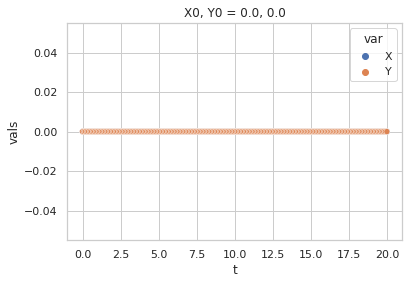

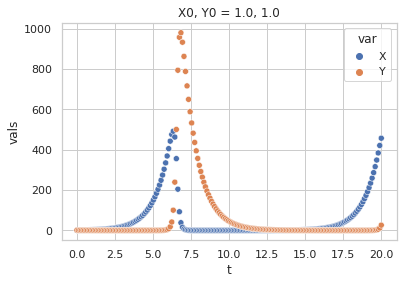

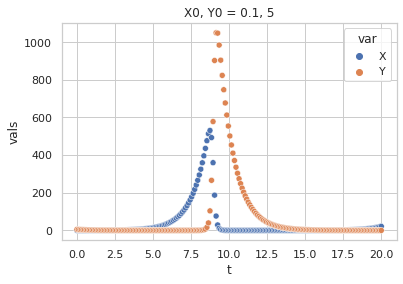

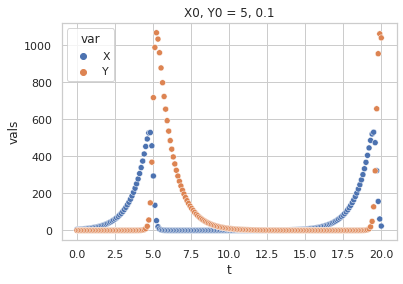

In [118]:
for kk in range(len(XYZs)):
    # %% Solve differential equation
    XY = XYs[kk]
    sol = solve_ivp(lambda t, xy: lotka(t, xy, ks), 
                [tspan[0], tspan[-1]], XY, t_eval=tspan)
    # Table me
    df = pandas.DataFrame(dict(t=np.array([sol.t]*2).flatten(), vals=sol.y.flatten(),
                          var=['X']*nstep + ['Y']*nstep))
    # Plot me
    ax = sns.scatterplot(data=df, x='t', y='vals', hue='var')
    ax.set_title('X0, Y0 = {}, {}'.format(XY[0], XY[1]))
    plt.show()

## Whoa!

## We see that $Y$ (the predator, I presume) shows growth after $X$ (the prey).  

## And this leads to the reduction in $X$ and, eventually, a reduction in $Y$

## And the cycle repeats

----

# (b) phase space

### Let's begin with Lotka (i.e. 2D)

In [123]:
XY = (5, 0.1)
sol = solve_ivp(lambda t, xy: lotka(t, xy, ks), 
            [tspan[0], tspan[-1]], XY, t_eval=tspan)
# U, V (i.e. dX/dt, dY/dt)
X = sol.y[0,:]
Y = sol.y[1, :]
U, V = [], []
for t, x, y in zip(sol.t, X, Y):
    dXdt, dYdt = lotka(t, [x,y], ks)
    U.append(dXdt)
    V.append(dYdt)

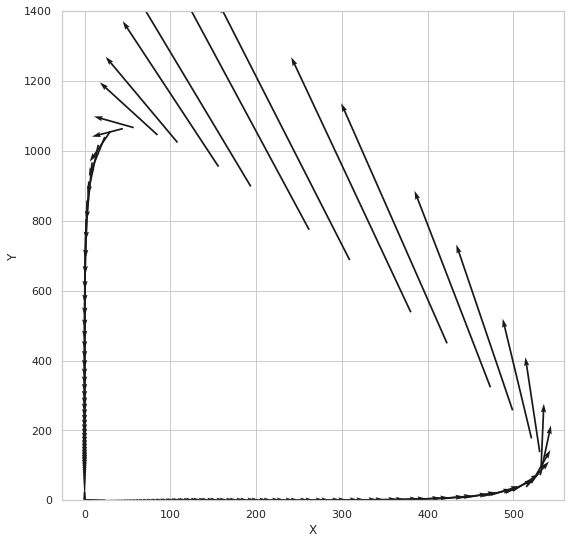

In [126]:
fig = plt.figure(figsize=(9,9))
plt.quiver(X, Y, U, V)
# Label
ax = plt.gca()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylim(0., 1400.)
#
plt.show()

----

## Now Lorentz for the last set of values

In [128]:
XYZ = XYZs[kk]
sol = solve_ivp(lambda t, xyz: lorentz(t, xyz, pbr2), 
            [tspan[0], tspan[-1]], XYZ, t_eval=tspan)
# U, V (i.e. dX/dt, dY/dt)
X = sol.y[0,:]
Y = sol.y[1, :]
Z = sol.y[2, :]
U, V, W = [], [], []
for t, x, y, z in zip(sol.t, X, Y, Z):
    dXdt, dYdt, dZdt = lorentz(t, [x,y,z], pbr2)
    U.append(dXdt)
    V.append(dYdt)
    W.append(dZdt)

### $X, Y$ plane

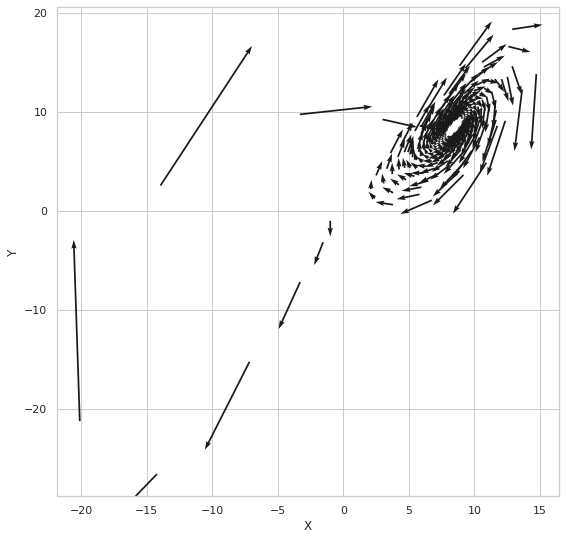

In [129]:
fig = plt.figure(figsize=(9,9))
plt.quiver(X, Y, U, V)
# Label
ax = plt.gca()
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_ylim(0., 1400.)
#
plt.show()

### Woah!  That is super cool

## $YZ$ plane

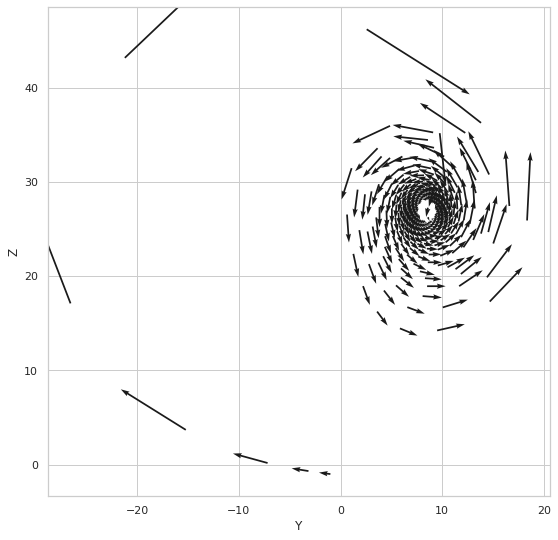

In [130]:
fig = plt.figure(figsize=(9,9))
plt.quiver(Y, Z, V, W)
# Label
ax = plt.gca()
ax.set_xlabel('Y')
ax.set_ylabel('Z')
#ax.set_ylim(0., 1400.)
#
plt.show()

### Still cool!

## Last, $XZ$

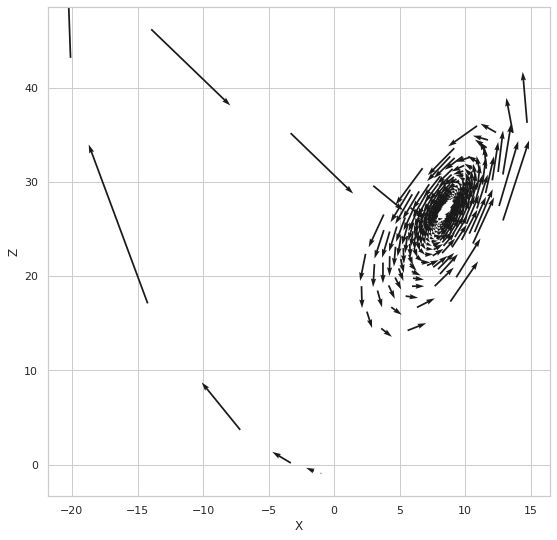

In [131]:
fig = plt.figure(figsize=(9,9))
plt.quiver(X, Z, U, W)
# Label
ax = plt.gca()
ax.set_xlabel('X')
ax.set_ylabel('Z')
#ax.set_ylim(0., 1400.)
#
plt.show()

### Gosh..

### None of this was really apparent (to me) from the spatial plots!

----

# 3) Stability and Bifurcation 

## a) Stability of the Logistic equation

### Find the fixed points

## $F = r x \left ( 1 - x/k \right ) = 0$

### The fixed points are clearly at $x=0$ and $x=k$

### Stability around $x=0$

## $\frac{dF}{dx} = r - 2rx/k$

## $\frac{dF}{dx} \big |_{x=0} = r$

### Therefore, $w=r$ and $x = \exp(r t)$

### For $r > 0$, the system is instable.

### Now, stability around $x=k$

## $\frac{dF}{dx} \big |_{x=k} = -r$

### Therefore, for $r>0$, the system is stable.

## b)  Stability of fixed points of the Lorenz Equations

## $\frac{dX}{dt} = p r (-X + Y)$

## $\frac{dY}{dt} = rX - Y - XZ$

## $\frac{dZ}{dt} = XY - bZ$

### with $r$ varying and $pr=10, b=8/3$

### Consider the fixed point $X=Y=Z=0$

## This gives a characteristic equation:

## $w^3 + ( 1 + pr+b ) w^2  + ( pr+b + b  pr - r   pr ) w + b  pr(1-r) = 0$


### Find the roots

In [4]:
def find_roots(r, pr=10, b=8/3):
    p = np.array([1., 1+pr+b, pr+b+b*pr-r*pr, b*pr*(1-r)])
    W = np.roots(p)
    return W

In [5]:
find_roots(0.)

array([-10.        ,  -2.66666667,  -1.        ])

### Loop on $r$

In [9]:
r = np.arange(0., 14, .01)
maxW = []
for ir in r:
    maxW.append(np.max(find_roots(ir)))

In [11]:
maxW[0:5]

[-0.9999999999999996,
 -0.9889025725440151,
 -0.9778323781619945,
 -0.9667892173427445,
 -0.9557728929992945]

### Plot

Text(0, 0.5, '${\\rm max}[W]$')

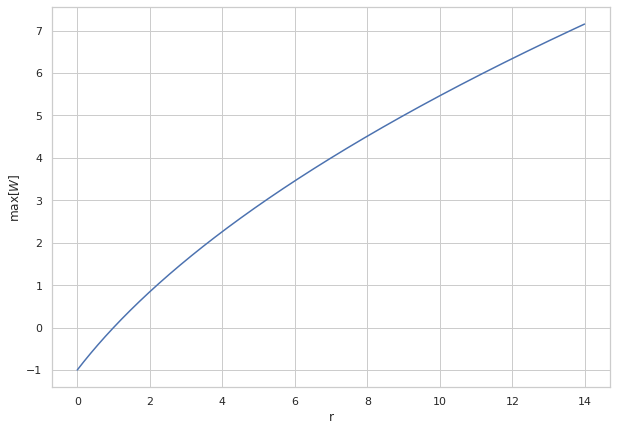

In [16]:
fig = plt.figure(figsize=(10,7))
ax = sns.lineplot(x=r, y=maxW)
ax.set_xlabel('r')
ax.set_ylabel(r'${\rm max}[W]$')